In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel(r"C:\Users\ASUS\Documents\Data.xlsx")

In [3]:
df['Year']=pd.to_datetime(df['Year'])

In [4]:
df.head()

,Year,GDP
0,2000-03-31,291667.301632
1,2001-03-31,296907.504961
2,2002-03-31,321510.243174
3,2003-03-31,352451.546568
4,2004-03-31,400846.585696


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
decomposition = seasonal_decompose(df['GDP'], model='additive',period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
years = df['Year']

### Decomposition

### Additive Model Formula
The **Additive Model** for time series decomposition is expressed as:

\$
Y(t) = Trend(t) + Seasonality(t) + Residuals(t)
\$

It is suitable when variations around the trend are **constant** over time.


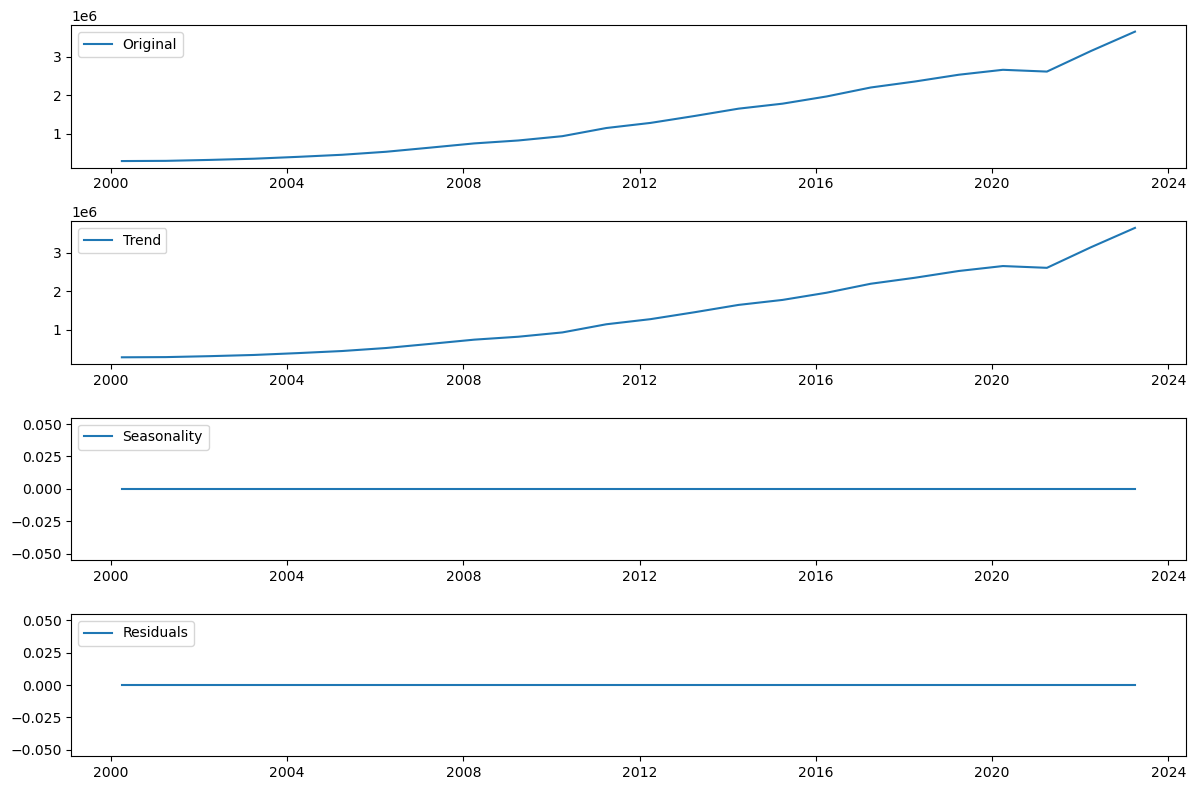

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(years,df['GDP'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(years,trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(years,seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(years,residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
df['log_gdp']=np.log(df['GDP'])

In [33]:
decomposition = seasonal_decompose(df['log_gdp'], model='multiplicative',period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
years = df['Year']

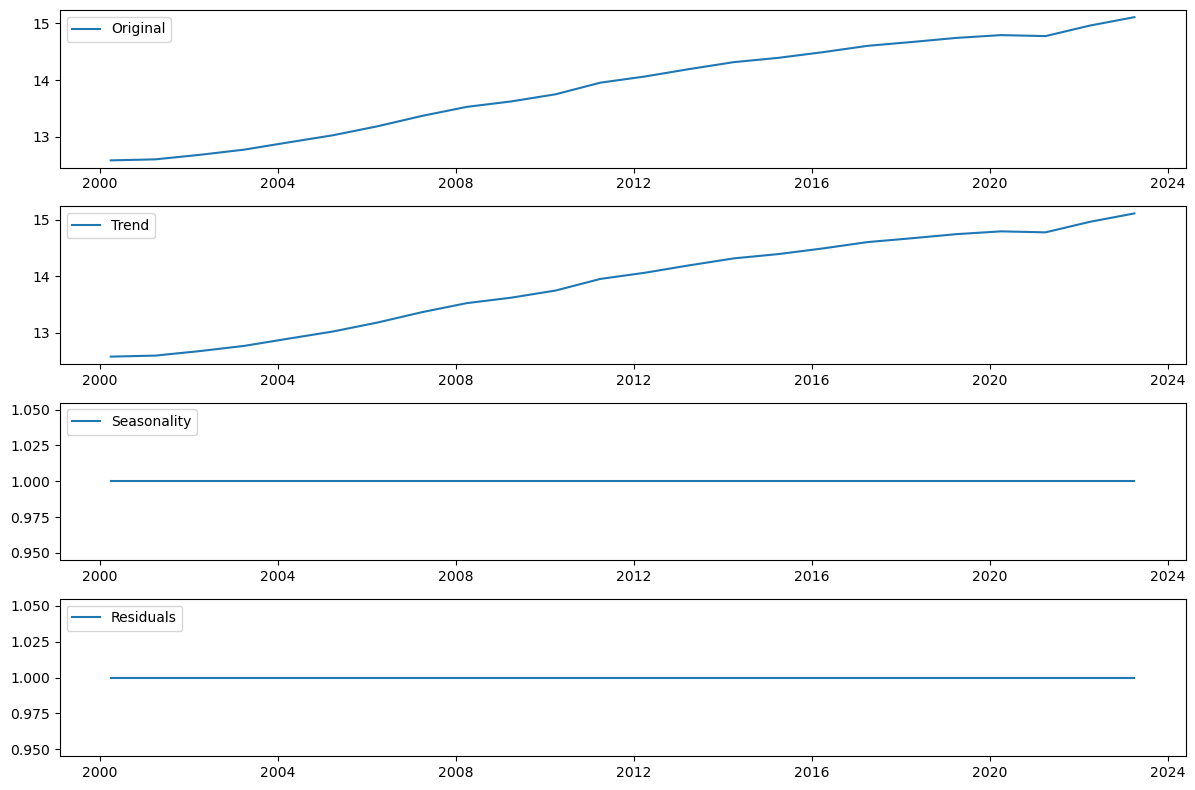

In [34]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(years,df['log_gdp'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(years,trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(years,seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(years,residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

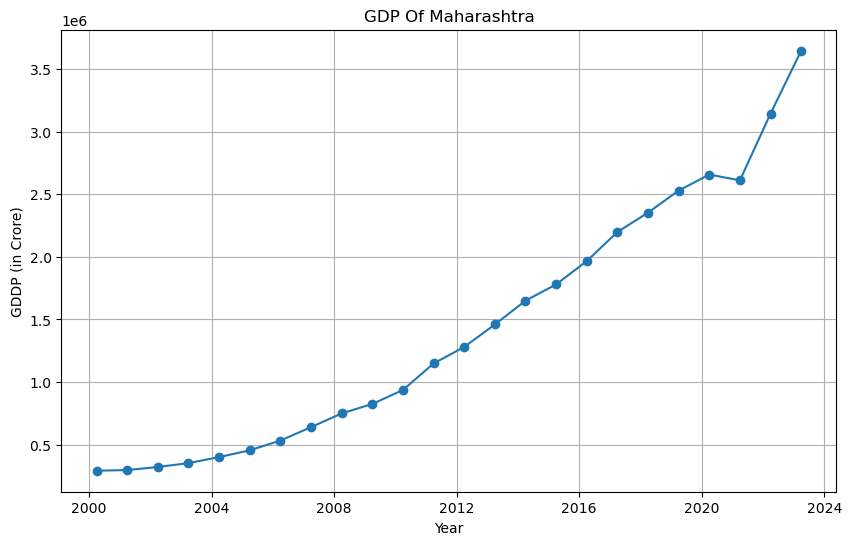

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df['GDP'], marker='o', linestyle='-')
plt.title("GDP Of Maharashtra")
plt.xlabel("Year")
plt.ylabel("GDDP (in Crore)")
plt.grid(True)
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['GDP'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("Series is non-stationary.")
else:
    print("Series is stationary.")


ADF Statistic: -0.8390368041509788
p-value: 0.8073855834207704
Series is non-stationary.


In [11]:
diff=df['GDP'].diff().fillna(0)

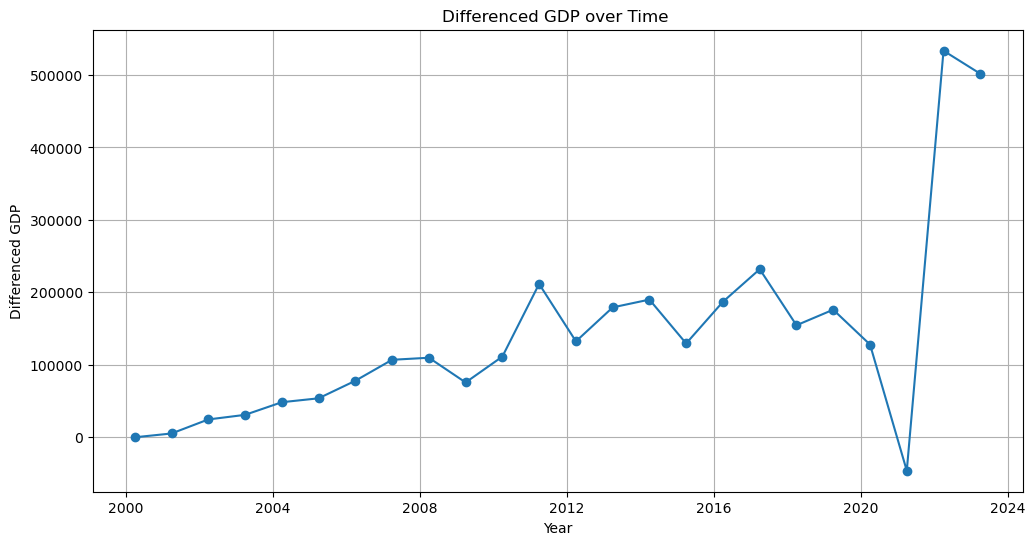

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], diff, marker='o', linestyle='-')
plt.title('Differenced GDP over Time ')
plt.xlabel('Year')
plt.ylabel('Differenced GDP')
plt.grid(True)
plt.show()

In [13]:
result = adfuller(diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -2.001665676331938
p-value: 0.28584323606805884
The time series is not stationary.


In [14]:
diff2 = diff.diff().fillna(0)

In [15]:
result = adfuller(diff2)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -3.483161410252861
p-value: 0.00843022321408621
The time series is stationary.


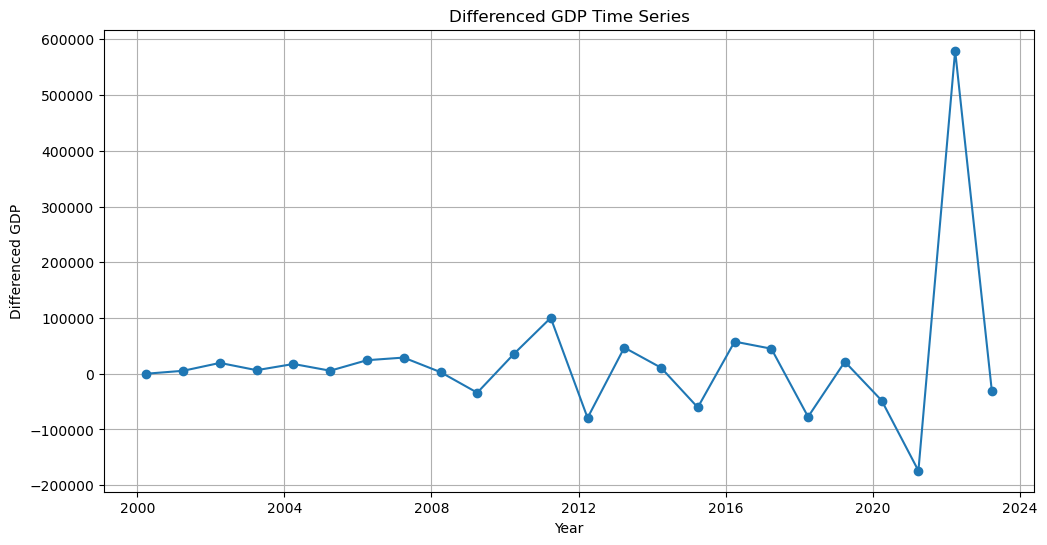

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], diff2, marker='o', linestyle='-')
plt.title('Differenced GDP Time Series')
plt.xlabel('Year')
plt.ylabel('Differenced GDP')
plt.grid(True)
plt.show()

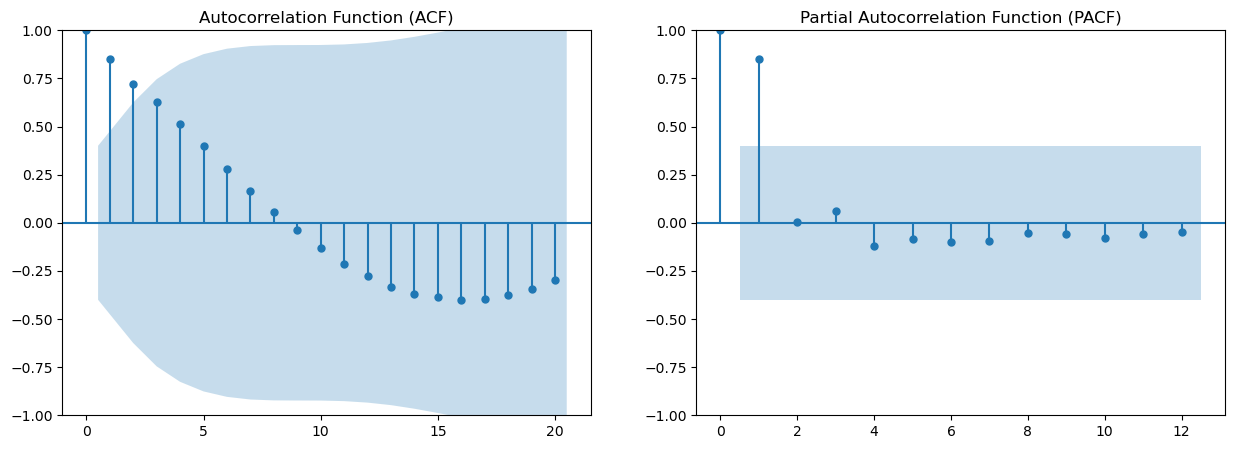

In [43]:
import statsmodels.api as sm

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sm.graphics.tsa.plot_acf(df['GDP'], lags=20, ax=axes[0],alpha=0.05)
sm.graphics.tsa.plot_pacf(df['GDP'], lags=12, ax=axes[1],alpha=0.05)

axes[0].set_title('Autocorrelation Function (ACF)')
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.show()


<Figure size 800x500 with 0 Axes>

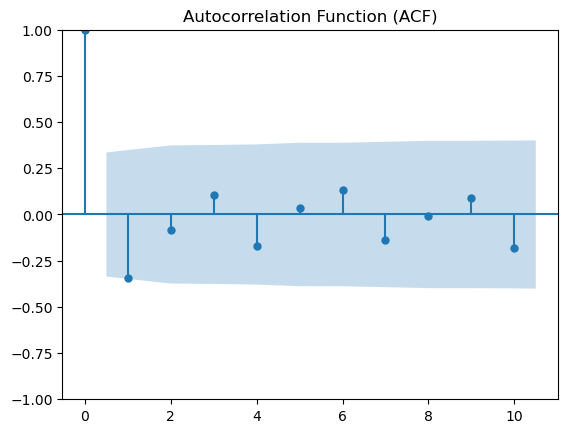

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sm.graphics.tsa.plot_acf(diff2, lags=10, alpha=0.10)
plt.title('Autocorrelation Function (ACF)')
plt.show()


<Figure size 800x500 with 0 Axes>

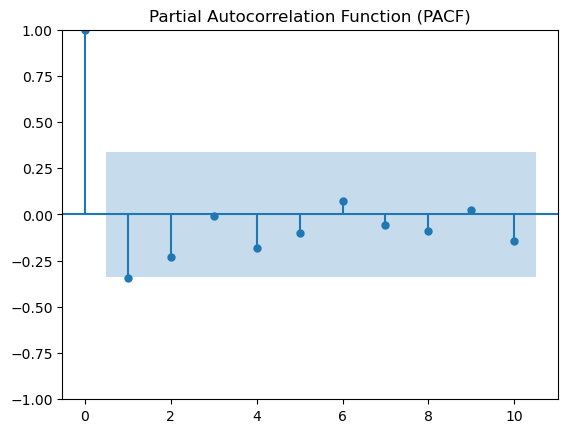

In [18]:
plt.figure(figsize=(8, 5))
sm.graphics.tsa.plot_pacf(diff2, lags=10, alpha=0.10)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


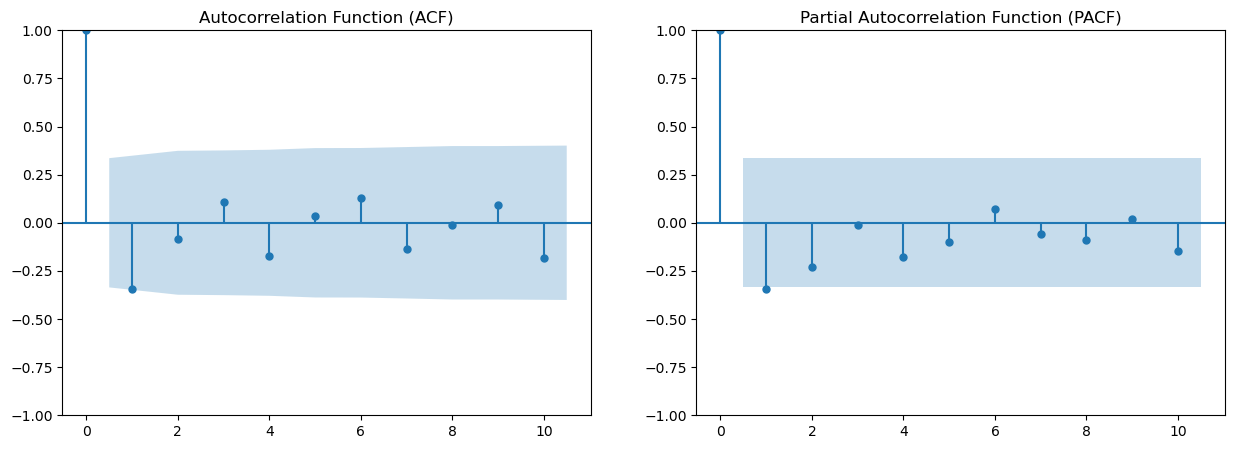

In [45]:
import statsmodels.api as sm

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sm.graphics.tsa.plot_acf(diff2, lags=10, ax=axes[0],alpha=0.10)
sm.graphics.tsa.plot_pacf(diff2, lags=10, ax=axes[1],alpha=0.10)

axes[0].set_title('Autocorrelation Function (ACF)')
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.show()


In [19]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(diff2, lags=1).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    GDP   No. Observations:                   24
Model:                     AutoReg(1)   Log Likelihood                -302.238
Method:               Conditional MLE   S.D. of innovations         123235.207
Date:                Sun, 30 Mar 2025   AIC                            610.476
Time:                        01:30:54   BIC                            613.883
Sample:                             1   HQIC                           611.333
                                   24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.991e+04   2.61e+04      1.146      0.252   -2.12e+04    8.11e+04
GDP.L1        -0.3490      0.196     -1.780      0.075      -0.733       0.035
                                    Roots           

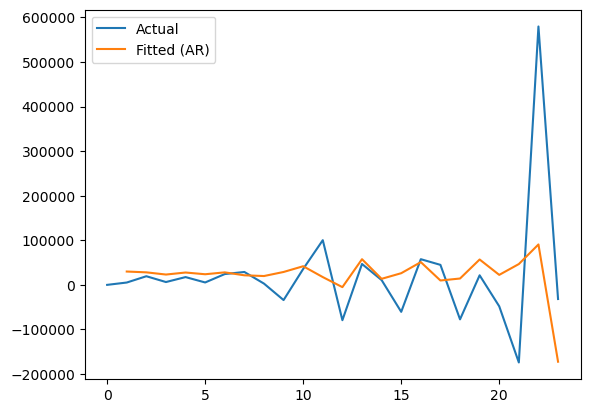

In [20]:
plt.plot(diff2, label='Actual')
plt.plot(ar_model.fittedvalues, label='Fitted (AR)')
plt.legend()
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model (order q=1)
ma_model = ARIMA(df['GDP'], order=(1, 2, 1)).fit()
print(ma_model.summary())


                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   24
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -289.575
Date:                Sun, 30 Mar 2025   AIC                            585.151
Time:                        01:42:10   BIC                            588.424
Sample:                             0   HQIC                           585.922
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2497      1.079      0.231      0.817      -1.864       2.364
ma.L1         -0.7613      1.235     -0.616      0.538      -3.182       1.660
sigma2      2.044e+10   2.87e-10   7.12e+19      0.0

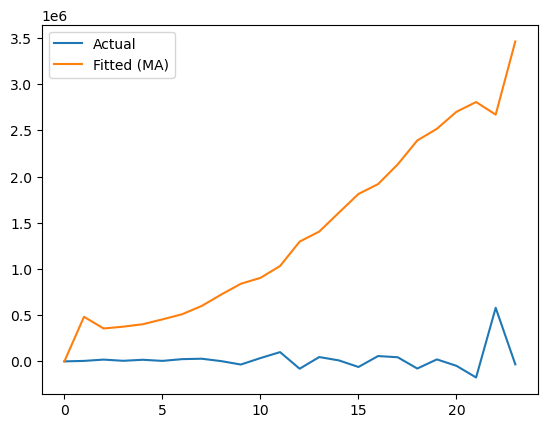

In [22]:
# Plot the prediction
plt.plot(diff2, label='Actual')
plt.plot(ma_model.fittedvalues, label='Fitted (MA)')
plt.legend()
plt.show()


In [23]:
arima_model = ARIMA(df['GDP'], order=(1, 2, 1)).fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   24
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -289.575
Date:                Sun, 30 Mar 2025   AIC                            585.151
Time:                        01:42:21   BIC                            588.424
Sample:                             0   HQIC                           585.922
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2497      1.079      0.231      0.817      -1.864       2.364
ma.L1         -0.7613      1.235     -0.616      0.538      -3.182       1.660
sigma2      2.044e+10   2.87e-10   7.12e+19      0.0

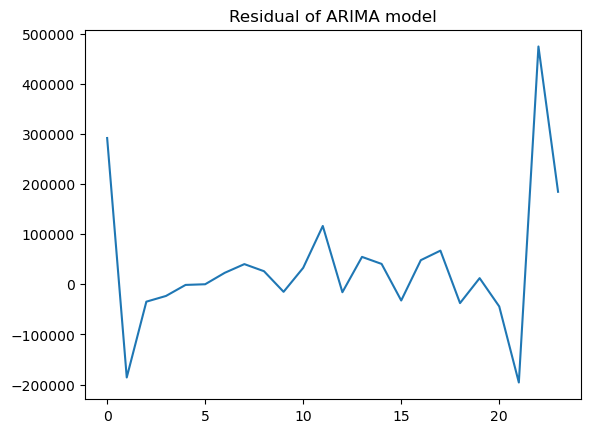

In [24]:
# Plot the prediction

plt.plot(arima_model.resid)
plt.title("Residual of ARIMA model")

plt.show()


In [26]:
residuals = arima_model.resid

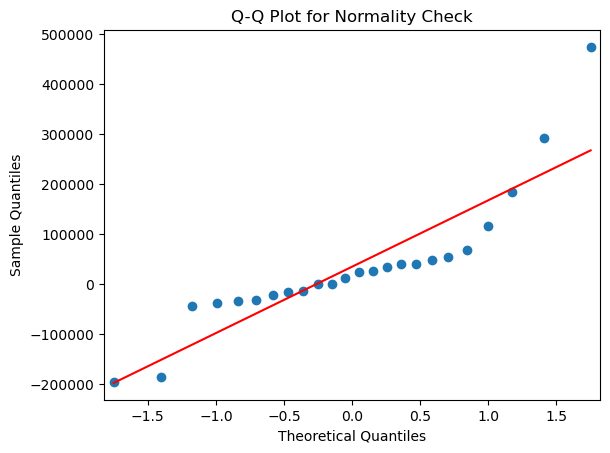

In [27]:
import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot for Normality Check")
plt.show()


In [128]:
import pmdarima as pm

In [132]:
diff = df["GDP"].diff().diff().dropna()

In [140]:
# Fit AutoARIMA
model = pm.auto_arima(df['GDP'], 
                      seasonal=False, 
                      stepwise=True, 
                      suppress_warnings=True, 
                      trace=True) 

model

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=589.789, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=585.996, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=585.787, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=586.337, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=584.693, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=587.822, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.285 seconds


ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [298]:
arima_model = ARIMA(df['GDP'], order=(0, 2, 0)).fit()

In [299]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   24
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -291.347
Date:                Wed, 12 Feb 2025   AIC                            584.693
Time:                        12:57:18   BIC                            585.784
Sample:                             0   HQIC                           584.950
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.701e+10   1.77e+09      9.591      0.000    1.35e+10    2.05e+10
Ljung-Box (L1) (Q):                   3.05   Jarque-Bera (JB):               138.76
Prob(Q):                              0.08   Pr

In [28]:
# Step 7: Forecast Future Values
forecast_steps = 3  # Forecast next 5 years
forecast = arima_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df['Year'].iloc[-1], periods=forecast_steps + 1, freq='Y')[1:]
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11088\2952064147.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=df['Year'].iloc[-1], periods=forecast_steps + 1, freq='Y')[1:]


In [29]:
forecast= pd.DataFrame({
    'Year': forecast_index,
    'Forecasted_GDP': forecast_values.values
})


In [30]:
forecast

,Year,Forecasted_GDP
0,2024-12-31,3.999269e+06
1,2025-12-31,4.315609e+06
2,2026-12-31,4.622697e+06


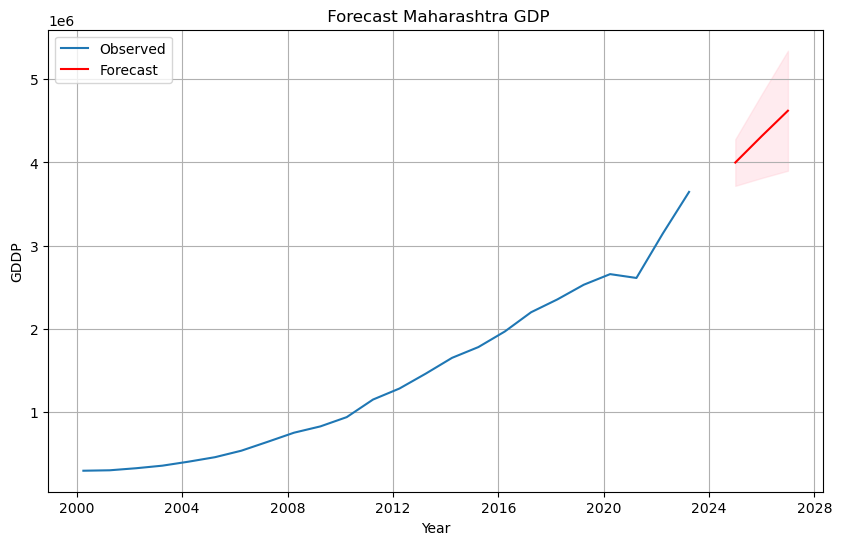

In [31]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['GDP'], label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title(" Forecast Maharashtra GDP")
plt.xlabel("Year")
plt.ylabel("GDDP")
plt.legend()
plt.grid()
plt.show()


In [32]:
predicted=df['GDP']-(arima_model.resid)
predicted

0     0.000000e+00
1     4.825732e+05
2     3.561014e+05
3     3.756725e+05
4     4.020487e+05
5     4.544973e+05
6     5.096536e+05
7     5.993017e+05
8     7.231944e+05
9     8.399566e+05
10    9.035254e+05
11    1.031674e+06
12    1.296135e+06
13    1.404948e+06
14    1.608975e+06
15    1.811392e+06
16    1.918068e+06
17    2.131034e+06
18    2.390231e+06
19    2.516569e+06
20    2.700937e+06
21    2.806338e+06
22    2.669991e+06
23    3.461410e+06
dtype: float64

In [33]:
# Generate in-sample predictions
predicted_values = arima_model.predict(start=0, end=len(df)-1)  # Use the model you fitted
df['Predicted_GDP'] = predicted_values

# Display actual vs predicted values
print(df[['Year', 'GDP', 'Predicted_GDP']])


         Year           GDP  Predicted_GDP
0  2000-03-31  2.916673e+05   0.000000e+00
1  2001-03-31  2.969075e+05   4.825732e+05
2  2002-03-31  3.215102e+05   3.561014e+05
3  2003-03-31  3.524515e+05   3.756725e+05
4  2004-03-31  4.008466e+05   4.020487e+05
5  2005-03-31  4.546264e+05   4.544973e+05
6  2006-03-31  5.326289e+05   5.096536e+05
7  2007-03-31  6.395692e+05   5.993017e+05
8  2008-03-31  7.493402e+05   7.231944e+05
9  2009-03-31  8.250077e+05   8.399566e+05
10 2010-03-31  9.363796e+05   9.035254e+05
11 2011-03-31  1.148001e+06   1.031674e+06
12 2012-03-31  1.280369e+06   1.296135e+06
13 2013-03-31  1.459629e+06   1.404948e+06
14 2014-03-31  1.649647e+06   1.608975e+06
15 2015-03-31  1.779138e+06   1.811392e+06
16 2016-03-31  1.966225e+06   1.918068e+06
17 2017-03-31  2.198185e+06   2.131034e+06
18 2018-03-31  2.352782e+06   2.390231e+06
19 2019-03-31  2.528854e+06   2.516569e+06
20 2020-03-31  2.656806e+06   2.700937e+06
21 2021-03-31  2.610651e+06   2.806338e+06
22 2022-03-

In [300]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [315]:
mae = mean_absolute_error(df['GDP'], predicted_values)
mape = np.mean(np.abs((df['GDP'] - predicted_values) / df['GDP'])) * 100
rmse = np.sqrt(mean_squared_error(df['GDP'], predicted_values))

print("MAE:", mae)
print("MAPE:", mape, "%")
print("RMSE:", rmse)

MAE: 86875.61142224562
MAPE: 11.929347956368279 %
RMSE: 154842.25776557173


<Figure size 600x400 with 0 Axes>

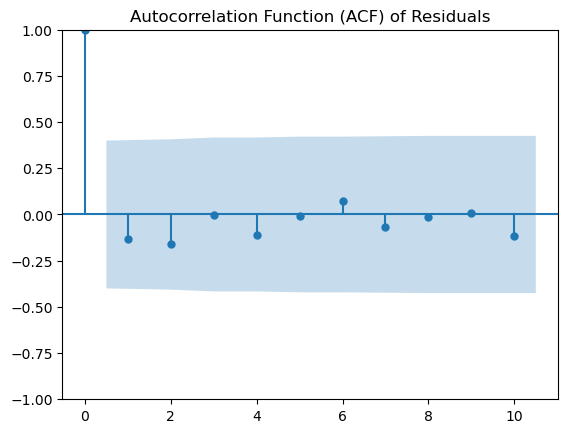

<Figure size 600x400 with 0 Axes>

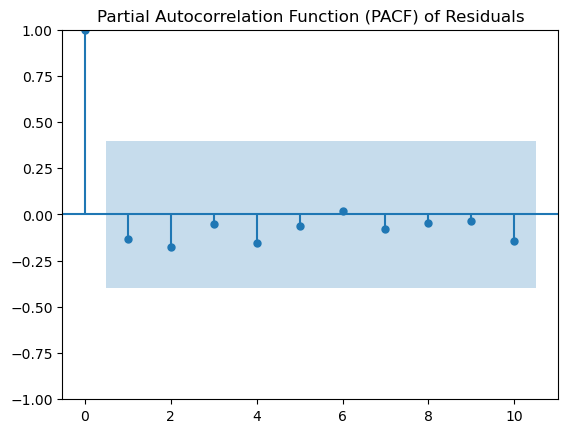

In [36]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ACF Plot (Autocorrelation Function)
plt.figure(figsize=(6, 4))
sm.graphics.tsa.plot_acf(arima_model.resid, lags=10, alpha=0.05)
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.show()

# PACF Plot (Partial Autocorrelation Function)
plt.figure(figsize=(6, 4))
sm.graphics.tsa.plot_pacf(arima_model.resid, lags=10, alpha=0.05)
plt.title("Partial Autocorrelation Function (PACF) of Residuals")
plt.show()


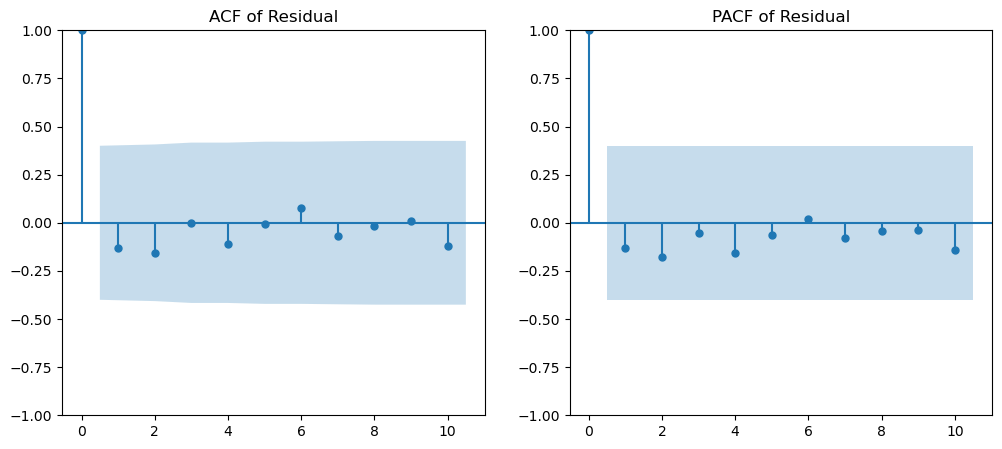

In [35]:
import statsmodels.api as sm

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.tsa.plot_acf(arima_model.resid, lags=10, ax=axes[0],alpha=0.05)
sm.graphics.tsa.plot_pacf(arima_model.resid, lags=10, ax=axes[1],alpha=0.05)

axes[0].set_title('ACF of Residual')
axes[1].set_title('PACF of Residual')
plt.show()


In [297]:
result = adfuller(arima_model.resid)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -3.5066749612939536
p-value: 0.007817312630870755
The time series is stationary.


In [ ]:
-3.5066749
0.00781731

In [232]:
result

,lb_stat,lb_pvalue
10,2.570966,0.989801


In [237]:
from statsmodels.stats.diagnostic import acorr_ljungbox

#Null Hypothesis (H₀): The residuals are white noise (no autocorrelation).
#Alternative Hypothesis (H₁): The residuals are not white noise (there is autocorrelation).


result = acorr_ljungbox(arima_model1.resid, lags=[10] ,return_df=True)
print(result)
p_value = result['lb_pvalue'].values[0]

if p_value > 0.05:
    print("p-value > 0.05: Fail to reject H₀. The residuals are likely white noise.")
else:
    print("p-value ≤ 0.05: Reject H₀. The residuals show autocorrelation.")


     lb_stat  lb_pvalue
10  2.570966   0.989801
p-value > 0.05: Fail to reject H₀. The residuals are not autocorrelated (they behave like white noise).


In [37]:
from scipy.stats import shapiro

#Null Hypothesis (H₀): The data (residuals) follows a normal distribution.
#Alternative Hypothesis (H₁): The data (residuals) does not follow a normal distribution.

stat, p = shapiro(arima_model.resid)
print(f"Shapiro-Wilk Test: W-statistic={stat:.4f}, p-value={p:.4f}")
if p>0.05:
    print("Residuals are normally distributed (Fail to reject H0)")
else:
    print("Residuals are not normally distributed (Reject H0)")

Shapiro-Wilk Test: W-statistic=0.8309, p-value=0.0010
Residuals are not normally distributed (Reject H0)

Shapiro-Wilk Test: W-statistic=0.8309, p-value=0.0010
Residuals are not normally distributed (Reject H0)


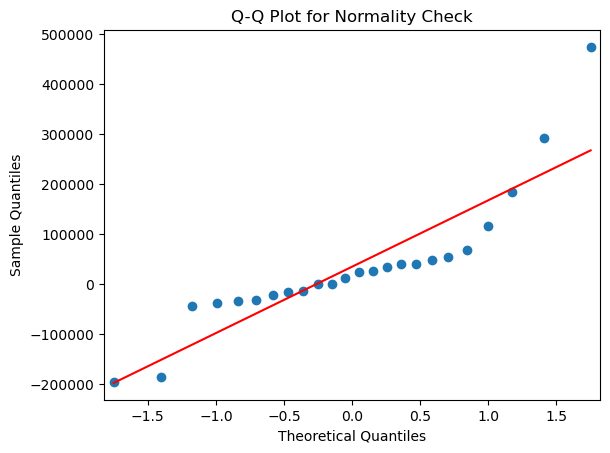

In [218]:
import statsmodels.api as sm

sm.qqplot(arima_model1.resid, line='s')
plt.title("Q-Q Plot for Normality Check")
plt.show()


In [219]:
residual=arima_model1.resid

In [220]:
from statsmodels.stats.diagnostic import het_arch

#H0: Residuals are homoscedastic (constant variance).
#H1: Residuals are heteroscedastic (varying variance).

residual=arima_model1.resid

arch_test = het_arch(residual)
print(f"LM Statistic: {arch_test[0]:.4f}")
print(f"p-value: {arch_test[1]:.4f}")

if arch_test[1] < 0.05:
    print("Heteroscedasticity detected (Reject H0). Consider an ARCH/GARCH model.")
else:
    print("No significant heteroscedasticity (Fail to reject H0).")


LM Statistic: 4.5224
p-value: 0.3399
No significant heteroscedasticity (Fail to reject H0).


In [221]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [222]:
alpha = 0.3  # Smoothing factor
model = SimpleExpSmoothing(df["GDP"])
fitted_model = model.fit(smoothing_level=alpha, optimized=False)
df["SES"] = fitted_model.fittedvalues

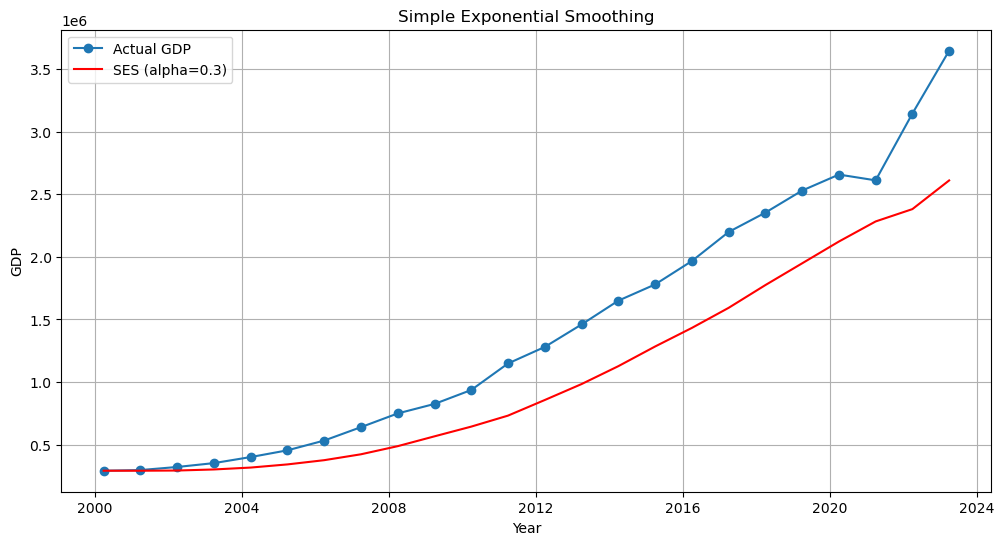

In [223]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["GDP"], marker="o", label="Actual GDP")
plt.plot(df["Year"], df["SES"], color="red", label=f"SES (alpha={alpha})")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Simple Exponential Smoothing")
plt.legend()
plt.grid(True)
plt.show()

In [225]:
df[['GDP',"SES"]]

,GDP,SES
0,2.916673e+05,2.916673e+05
1,2.969075e+05,2.916673e+05
2,3.215102e+05,2.932394e+05
3,3.524515e+05,3.017206e+05
4,4.008466e+05,3.169399e+05
5,4.546264e+05,3.421119e+05
6,5.326289e+05,3.758663e+05
7,6.395692e+05,4.228951e+05
8,7.493402e+05,4.878973e+05
9,8.250077e+05,5.663302e+05


In [226]:
Error=df['GDP']-df['SES']

In [227]:
Error

0     0.000000e+00
1     5.240203e+03
2     2.827088e+04
3     5.073092e+04
4     8.390668e+04
5     1.125145e+05
6     1.567627e+05
7     2.166742e+05
8     2.614429e+05
9     2.586775e+05
10    2.924461e+05
11    4.163333e+05
12    4.238022e+05
13    4.759207e+05
14    5.231625e+05
15    4.957050e+05
16    5.340802e+05
17    6.058167e+05
18    5.786680e+05
19    5.811404e+05
20    5.347505e+05
21    3.281700e+05
22    7.632059e+05
23    1.035990e+06
dtype: float64

# ARIMA Model Summary and Diagnostics

### Model Summary
- **Model:** ARIMA(1, 2, 1) — Autoregressive model of order 1 (AR=1), differencing of order 2 (D=2), and a moving average of order 1 (MA=1).
- **Number of Observations:** 24
- **Log Likelihood:** -297.776 — Higher values indicate a better model fit.
- **AIC (Akaike Information Criterion):** 601.552 — Used for model selection. Lower is better.
- **BIC (Bayesian Information Criterion):** 604.825 — Also used for model selection. Lower is better.

---

### Coefficient Estimates
- **ar.L1 (-0.9185):** Coefficient for the AR(1) term. A negative value suggests a negative relationship with the previous time step.
- **ma.L1 (-0.8777):** Coefficient for the MA(1) term, indicating a negative short-term error correction.
- **sigma² (5.361e+10):** Variance of the residuals (white noise).

---

### Statistical Tests
- **Ljung-Box Test (Q):**  
  - *p-value = 0.17* — Residuals are not significantly autocorrelated, meaning the model fits the data well in terms of capturing the autocorrelation structure.
  
- **Jarque-Bera Test (JB):**  
  - *Test Statistic = 104.08, p-value = 0.00* — Residuals are not normally distributed, indicating a potential problem with the model.
  
- **Heteroskedasticity (H):**  
  - *p-value = 0.00* — Residuals have changing variance (heteroskedasticity), violating one of the assumptions of ARIMA models.
  
- **Skew (2.75):**  
  - Residuals are positively skewed to the right.
  
- **Kurtosis (12.12):**  
  - High kurtosis indicates heavy tails and the presence of extreme outliers.

---

### Recommendations
1. **Residual Analysis:**  
   - Check the residuals more closely for normality and heteroskedasticity.  
   - Apply a transformation (e.g., log or Box-Cox transformation) to stabilize the variance.
   
2. **Reconsider the Differencing Order:**  
   - *D=2* may be too high. Start with *D=1* and recheck stationarity.
   
3. **Seasonality:**  
   - Try a seasonal model (SARIMA) if your data shows a seasonal pattern.

